## Loading Library

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings(
    "ignore",
    category=DeprecationWarning,
    module="jupyter_client.session"
)


!pip install mlxtend==0.23.1

# **A Day in the Life of a Data Analyst: Unraveling Insights from The Bread Basket Dataset**

---

**Thursday, December 5** <br>
As the sun rises on another busy Thursday, I settle into my workspace, ready to dive into The Bread Basket dataset. This dataset is a treasure trove of information, capturing the essence of customer transactions at a local bakery. My goal today is to uncover insights that can help the bakery optimize its offerings and enhance customer satisfaction.


## **Loading Dataset**
I start my day by loading the dataset into my Python environment. Yesterday, I got the dataset from my [Client](https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/bread%20basket%20(1).csv). Using Pandas, I import the data and take a moment to familiarize myself with its structure.

In [2]:
#1
df = pd.read_csv("https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/bread%20basket%20(1).csv")
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


As I glance through the initial rows, I see the columns: Transaction, Item, date_time, period_day, and weekday_weekend. Each transaction is unique, and I can already sense the potential insights hidden within.

## **Exploratory Data Analysis (EDA)**
With the dataset loaded, I transition into Exploratory Data Analysis (EDA). This phase is crucial for understanding the data better and identifying patterns.
### **Data Overview**
I begin by checking for missing values and summarizing the basic statistics of the dataset.

In [3]:
#2 info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [4]:
#3 check missing values
df.isnull().sum()

,0
Transaction,0
Item,0
date_time,0
period_day,0
weekday_weekend,0


4. The overview reveals a _________________________. (fill that blank on the section below)

The data overview reveals a complete dataset with no missing values.

### **Transaction Trends**
Next, I analyze transaction trends over time. I extract the date and hour from the date_time column to see how customer purchases vary throughout the day and week. Then, I visualize the daily transaction trends to identify peak days and times for customer activity.

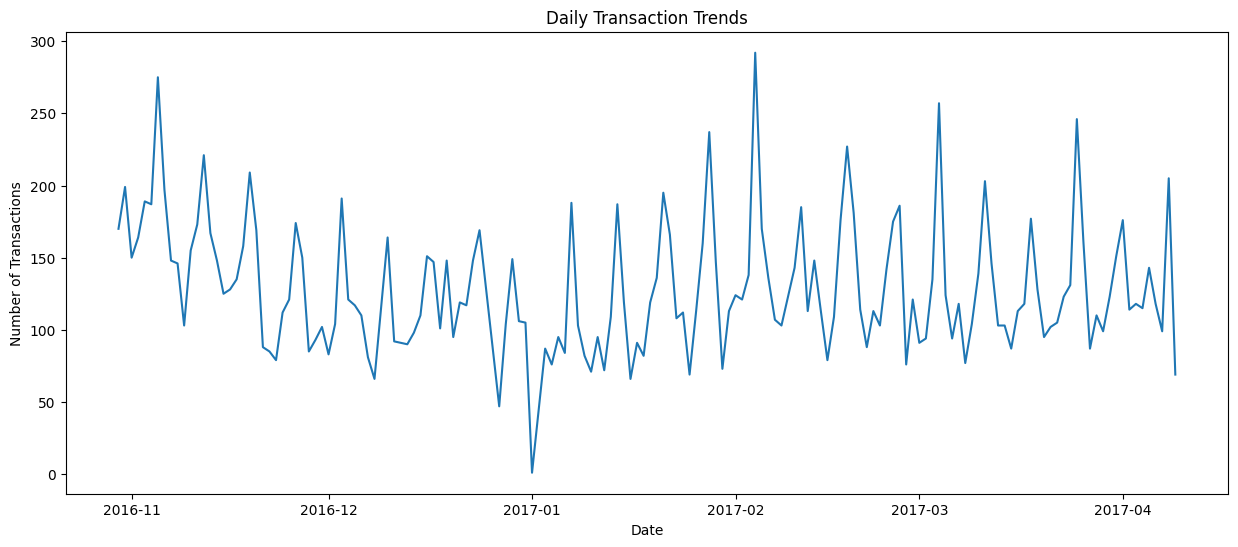

In [9]:
# 5
df['date_time'] = pd.to_datetime(df['date_time'], format='%d-%m-%Y %H:%M')
daily_transactions = df.groupby(df['date_time'].dt.date).size()

plt.figure(figsize=(15, 6))
daily_transactions.plot(kind='line')
plt.title('Daily Transaction Trends')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(False)
plt.show()


Oh my God, it's so difficult to get insights from this visualization, but it seems like there might be a trend to uncover. Let me try separating it by the perspective of hour, time, day, day_name, month, and year by adding each of those variabels into the dataframe.

In [6]:
# 6
df['day'] = df['date_time'].dt.day
df['month'] = df['date_time'].dt.month
df['year'] = df['date_time'].dt.year
df['time'] = df['date_time'].dt.time
df['hour'] = df['date_time'].dt.hour
df['day_name'] = df['date_time'].dt.day_name()
df.sample(5)

,Transaction,Item,date_time,period_day,weekday_weekend,day,month,year,time,hour,day_name
2801,1347,Hot chocolate,2016-11-15 09:16:00,morning,weekday,15,11,2016,09:16:00,9,Tuesday
11069,5520,Bread,2017-01-28 12:20:00,afternoon,weekend,28,1,2017,12:20:00,12,Saturday
2820,1358,Coffee,2016-11-15 10:52:00,morning,weekday,15,11,2016,10:52:00,10,Tuesday
13809,6714,Cake,2017-02-17 14:12:00,afternoon,weekday,17,2,2017,14:12:00,14,Friday
16961,8048,Muffin,2017-03-12 15:14:00,afternoon,weekend,12,3,2017,15:14:00,15,Sunday



Alright, now I can easily create a visualization of monthly sales.

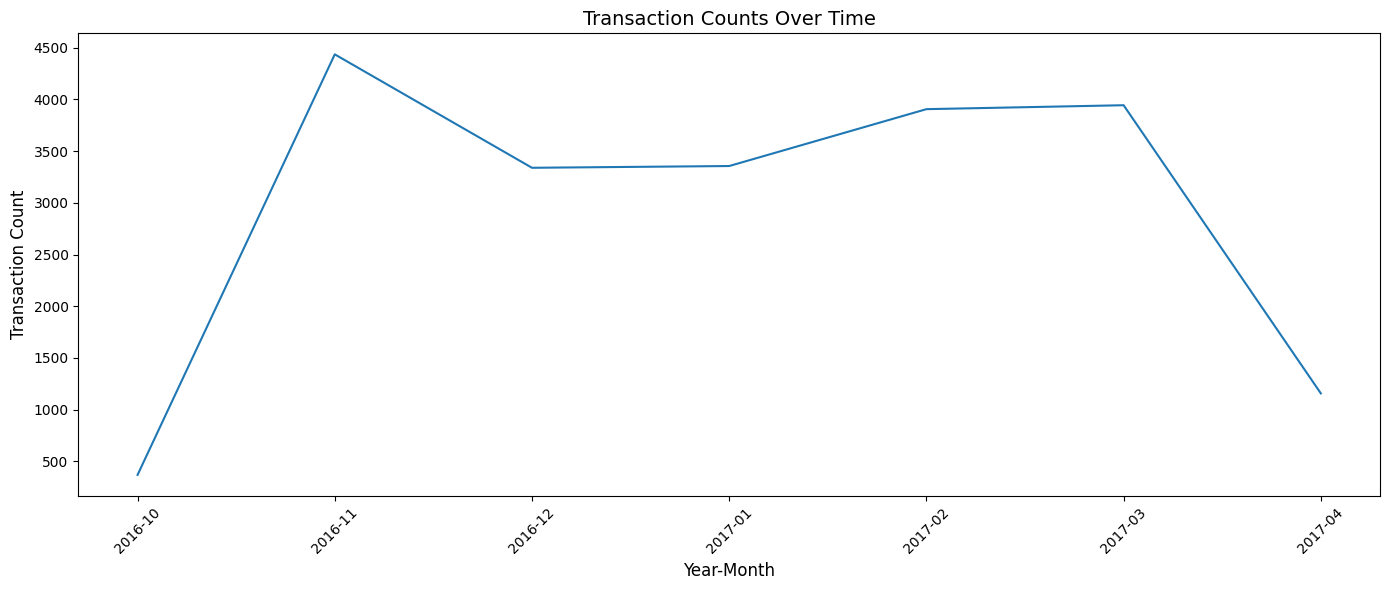

In [13]:
# 7
df["date_time"] = pd.to_datetime(df["date_time"], dayfirst=True)

df["year_month"] = df["date_time"].dt.to_period("M").astype(str)

monthly_transactions = df.groupby("year_month").size()

plt.figure(figsize=(14, 6))
plt.plot(monthly_transactions.index, monthly_transactions.values)

plt.title("Transaction Counts Over Time", fontsize=14)
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Transaction Count", fontsize=12)

plt.xticks(rotation=45)
plt.grid(False)

plt.tight_layout()
plt.show()

8. Now, the visualization above provides better insights: _________________________. (fill that blank on the section below)

Now, the visualization above provides better insights:

The line chart now provides a clear view of monthly transaction trends. Transactions started low in October 2016, peaked in November, then dipped in December and January, before rising again in February and March 2017, and finally dropping significantly in April 2017.



Next, I want to see if there's a trend for each day of the week in each month.
Oh, the dataframe has a column called weekday_weekend. What days include weekends and weekdays??

In [10]:
# 9
unique_weekday_names = df[df['weekday_weekend'] == 'weekday']['day_name'].unique()
unique_weekend_names = df[df['weekday_weekend'] == 'weekend']['day_name'].unique()

print(f"Unique weekday names: {unique_weekday_names}")
print(f"Unique weekend names: {unique_weekend_names}")

Unique weekday names: ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
Unique weekend names: ['Sunday' 'Saturday']



Oh, okay, now I know that "weekend" refers to Sunday and Saturday. Alright, moving on, before creating the visualization, it seems necessary to create an aggregation with the columns for the month and day name, where the values represent the total transactions that occurred.

In [14]:
# 10
monthly_daily_transactions = df.groupby(['month', 'day_name']).size().unstack(fill_value=0)
# Reorder columns to ensure consistent day order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
monthly_daily_transactions = monthly_daily_transactions.reindex(columns=day_order, fill_value=0)
monthly_daily_transactions

day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
month,,,,,,,
1,329,474,322,399,489,807,536
2,474,429,419,456,599,879,650
3,379,433,459,557,674,883,559
4,118,115,143,118,99,381,183
10,199,0,0,0,0,0,170
11,469,599,576,591,639,879,683
12,356,342,402,525,624,776,314


11. Wow, it turns out the insight that can be gained from the table above is _____

Wow, it turns out the insight that can be gained from the table above is that weekend days (Saturday and Sunday) consistently have a higher number of transactions compared to weekdays across most months. Additionally, there are no recorded transactions for Tuesday, Wednesday, Thursday, and Friday in October, which is an interesting anomaly.




It seems ready to create the visualization now. Okay, I will create a comparison visualization of total sales per day for each month.

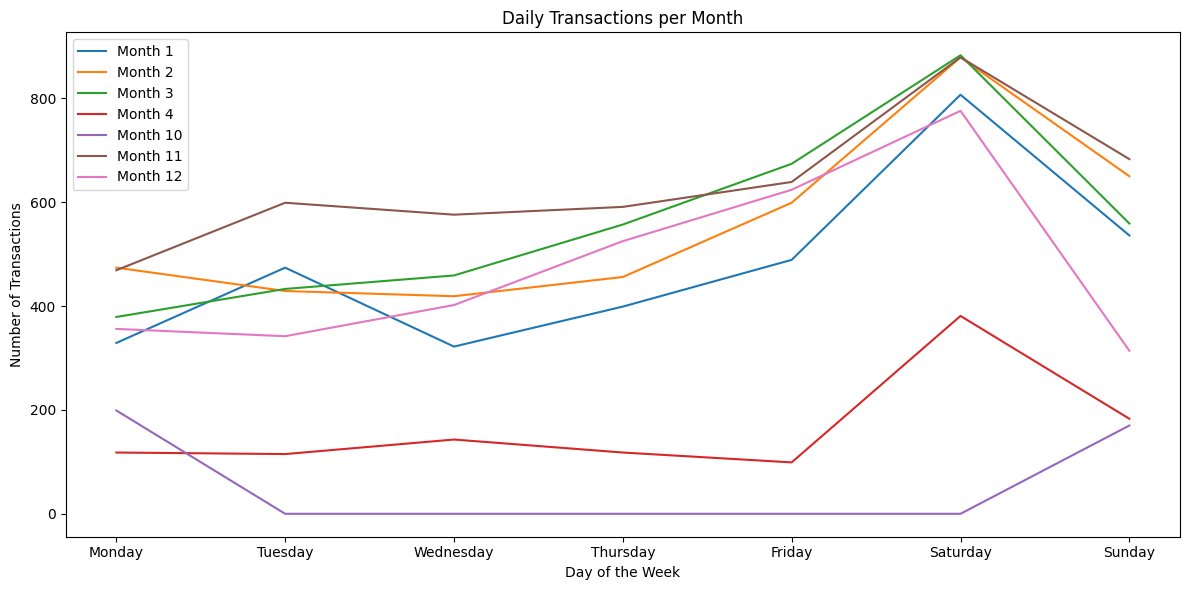

In [22]:
# 12
# Ensure day order is Monday -? Sunday
monthly_daily_transactions = monthly_daily_transactions[['Monday', 'Tuesday', 'Wednesday',
                           'Thursday', 'Friday', 'Saturday', 'Sunday']]

# --- Plot exactly like your example ---
plt.figure(figsize=(12, 6))

# one line per month
for month in monthly_daily_transactions.index:
    plt.plot(monthly_daily_transactions.columns,
             monthly_daily_transactions.loc[month],
             label=f"Month {month}")

plt.title("Daily Transactions per Month")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Transactions")
plt.legend()
plt.tight_layout()
plt.show()

13. Wow, after visualizing it like this, I can gain insights into the sales trends that ____.

Wow, after visualizing it like this, I can gain insights into the sales trends that weekend days (Saturday and Sunday) consistently have the highest transaction volumes across almost all months. Month 10 (October) and Month 4 (April) show significantly lower activity overall, especially during weekdays in October.



Oh, it turns out there's also a "period_day" column in the dataframe, but at the beginning, I only noticed "morning." Hmm, I'm curious, what other unique values could there be?

In [24]:
# 14
df['period_day'].unique()

array(['morning', 'afternoon', 'evening', 'night'], dtype=object)

Oh, okay, there are "morning," "afternoon," "evening," and "night."
But, but, but, what are the time ranges for morning, afternoon, evening, and night? Let me try to find out.

In [25]:
#  15

morning_hours = df[df['period_day'] == 'morning']['hour'].unique()
afternoon_hours = df[df['period_day'] == 'afternoon']['hour'].unique()
evening_hours = df[df['period_day'] == 'evening']['hour'].unique()
night_hours = df[df['period_day'] == 'night']['hour'].unique()

print(f"Unique morning_hour: {morning_hours}")
print(f"Unique afternoon_hour: {afternoon_hours}")
print(f"Unique evening_hour: {evening_hours}")
print(f"Unique night_hour: {night_hours}")

Unique morning_hour: [ 9 10 11  8  7  1]
Unique afternoon_hour: [12 13 14 15 16]
Unique evening_hour: [17 18 19 20]
Unique night_hour: [21 23 22]


16. Hah, I found something odd in the results above. Did you notice it too? What do you think is odd about it and why?

Yes, I did! The oddity is that the morning_hour array includes the hour 1 (1 AM). This is unusual because 1 AM is typically considered part of the 'night' period, not 'morning', especially for a bakery. It could suggest a data entry error, an unusual business operation at that hour, or a categorization that doesn't align with common understanding of 'morning'.


But that's okay, I'll just continue exploring the insights. It seems like I can create a sales analysis based on the hours of each day here.

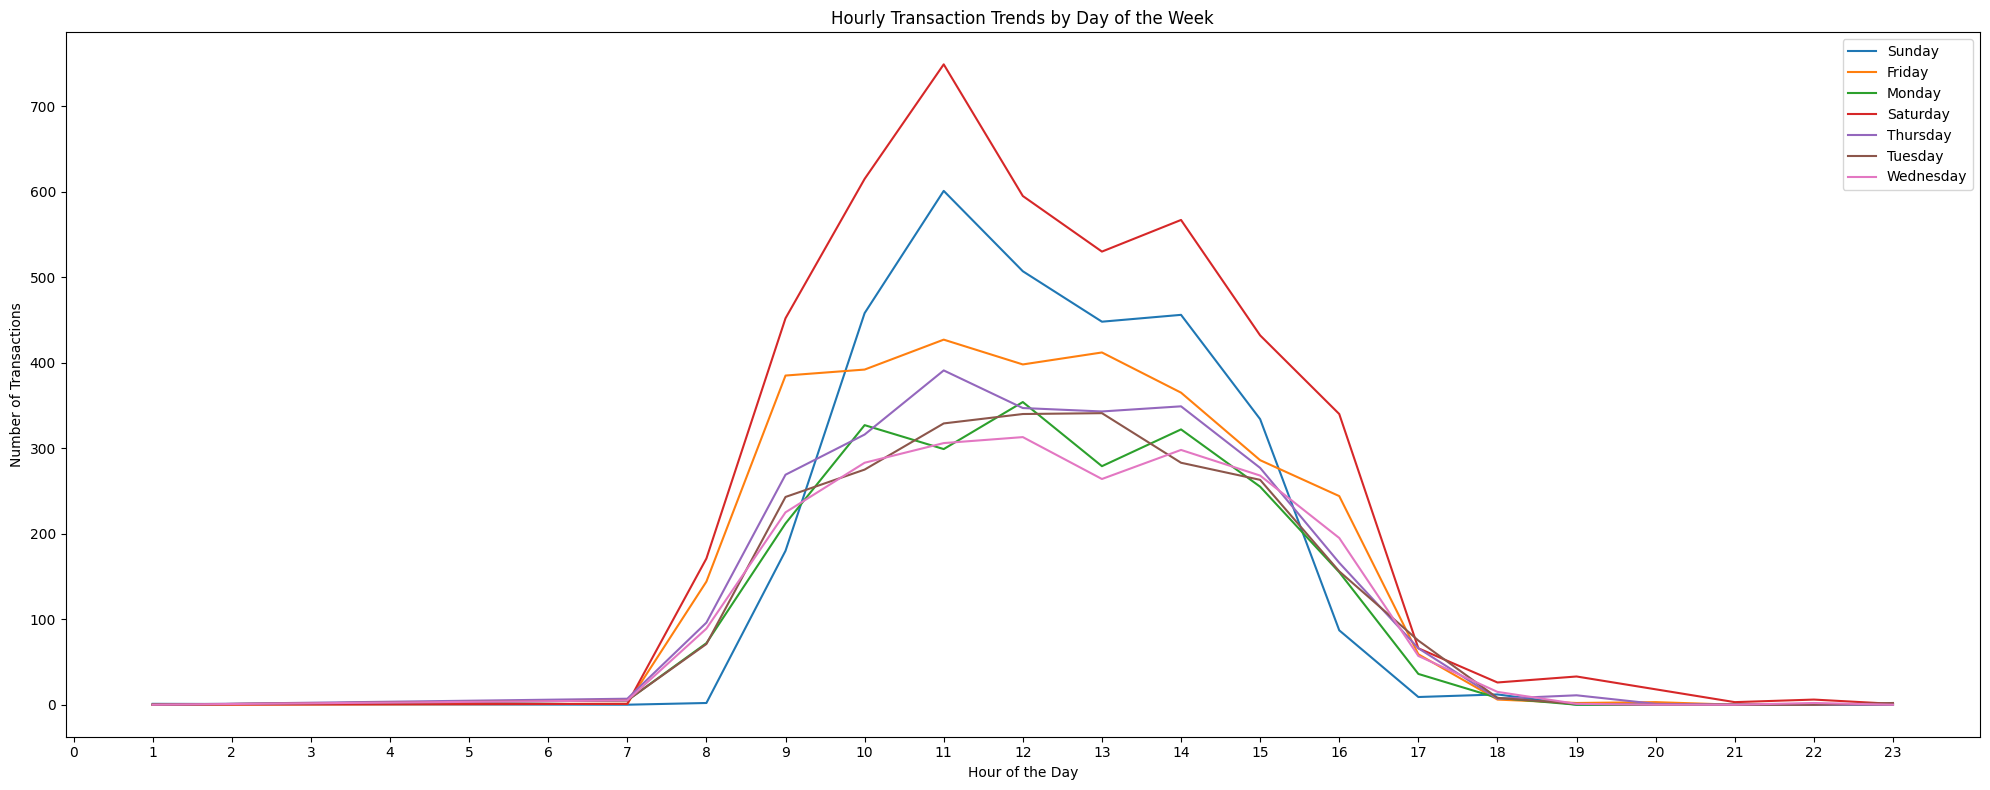

In [38]:
# 17

import pandas as pd
import matplotlib.pyplot as plt

# 1. Make sure date_time is datetime
#    (skip this line if it is already a datetime column)
df["date_time"] = pd.to_datetime(df["date_time"], dayfirst=True)

# 2. Extract hour and day name
df["hour"] = df["date_time"].dt.hour
df["day_of_week"] = df["date_time"].dt.day_name()

# 3. Count *rows* (transactions/items) per hour per day of week
hourly_counts = (
    df.groupby(["day_of_week", "hour"])
      .size()
      .unstack("day_of_week")
      .fillna(0)
)

# 4. Reorder days so the legend matches the screenshot
desired_order = ["Sunday", "Friday", "Monday", "Saturday", "Thursday", "Tuesday", "Wednesday"]
hourly_counts = hourly_counts.reindex(columns=desired_order)

# 5. Plot – one line per day of week
plt.figure(figsize=(20, 8))

for day in hourly_counts.columns:
    plt.plot(hourly_counts.index, hourly_counts[day], label=day)

plt.title("Hourly Transaction Trends by Day of the Week")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Transactions")
plt.xticks(range(0, 24))             # 0–23 on x-axis
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

18. The daily sales trend plot reveals that ___________

The daily sales trend plot reveals that the bakery experiences its peak transaction hours between 9 AM and 2 PM, with Saturday mornings and early afternoons being particularly busy. There is a noticeable drop in activity during early mornings and late evenings across all days.

### **Item Popularity**
Curious about which items are most popular, I analyze the frequency of orders for each item.

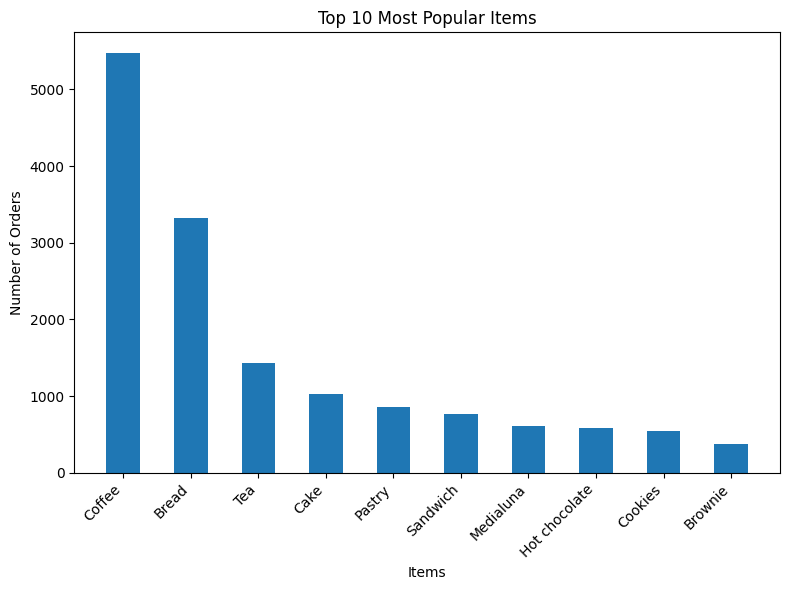

In [31]:
# 19
import pandas as pd
import matplotlib.pyplot as plt

# Count item frequencies
item_counts = df["Item"].value_counts().head(10)

# Plot
plt.figure(figsize=(8, 6))
plt.bar(item_counts.index, item_counts.values, width=0.5)

plt.title("Top 10 Most Popular Items")
plt.xlabel("Items")
plt.ylabel("Number of Orders")

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Hmm, but this is overall data. I want to create a visualization by period instead, maybe the highest sales vary by period.

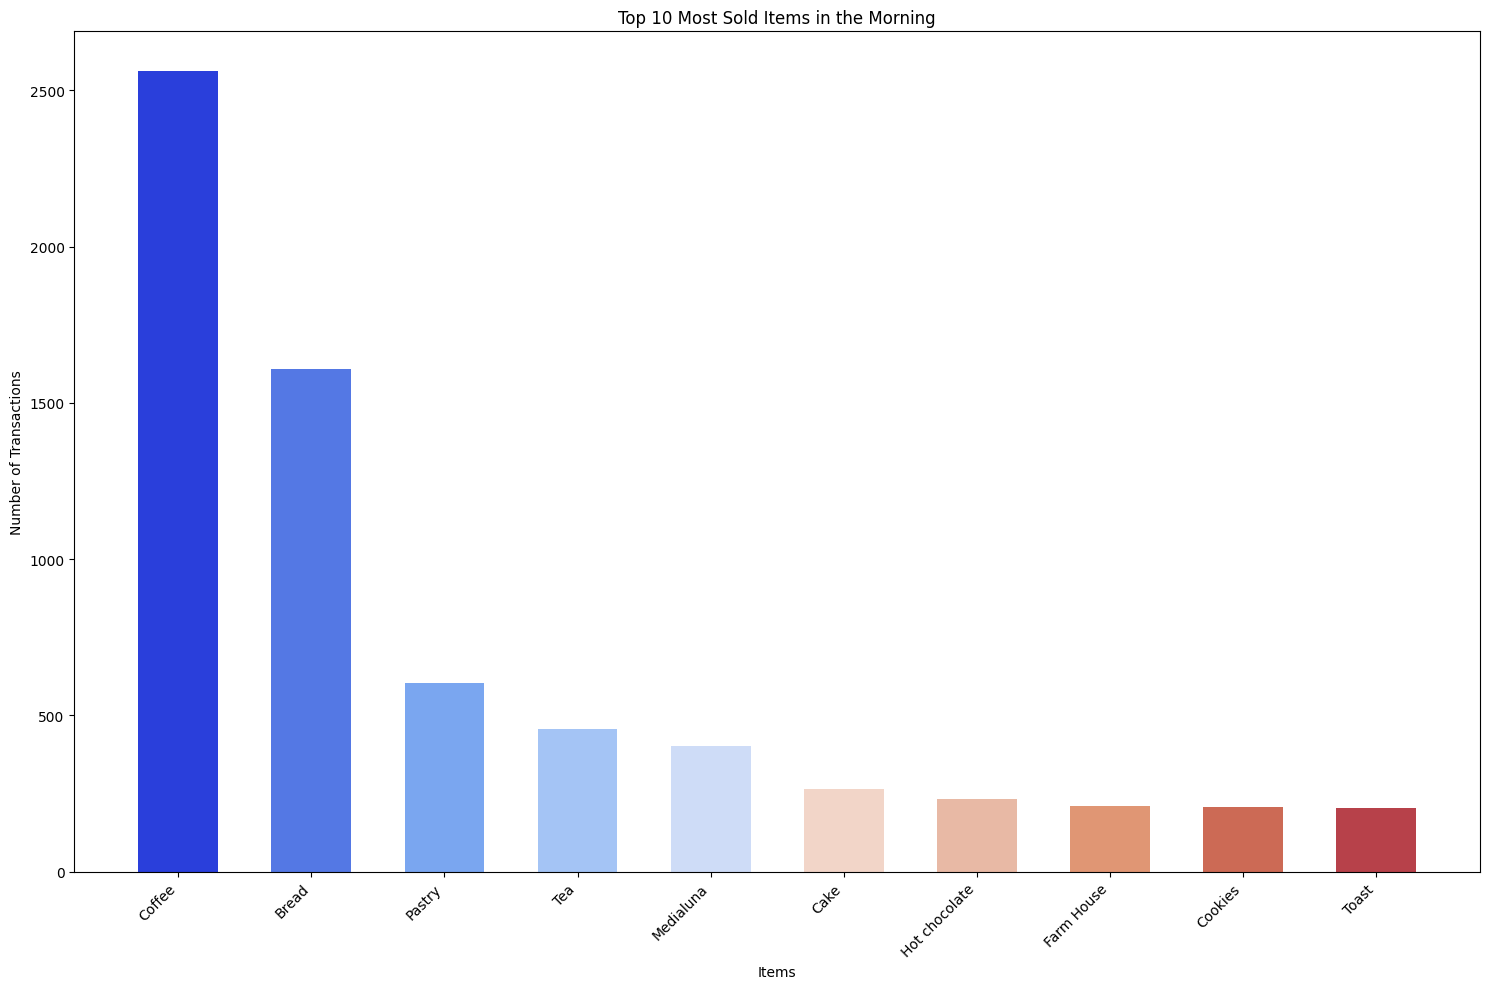

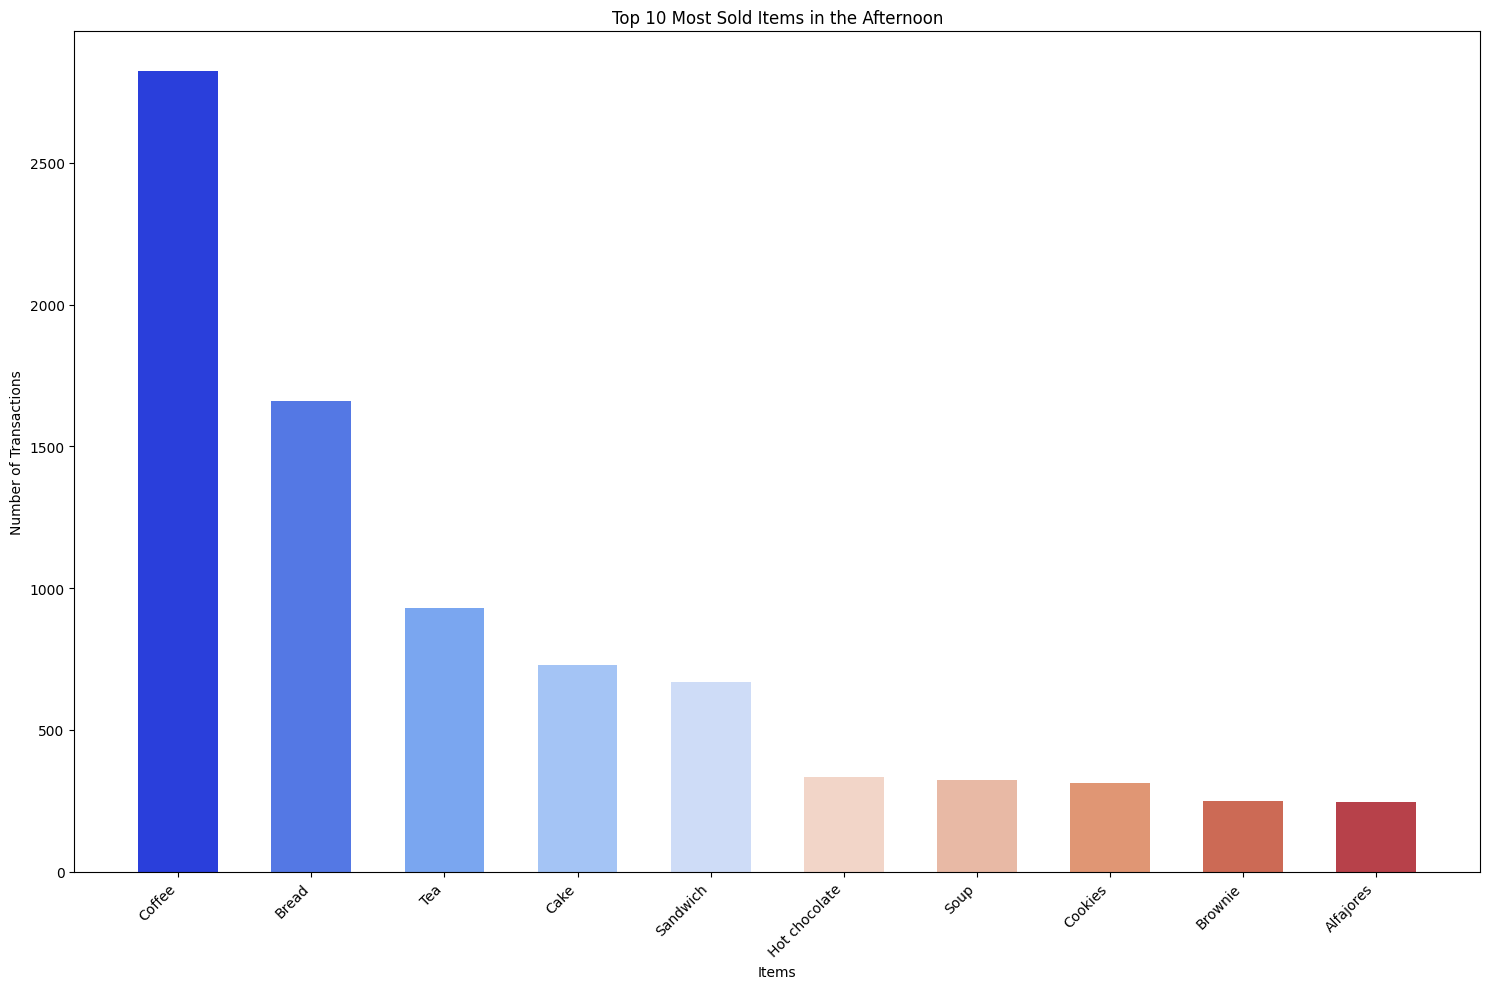

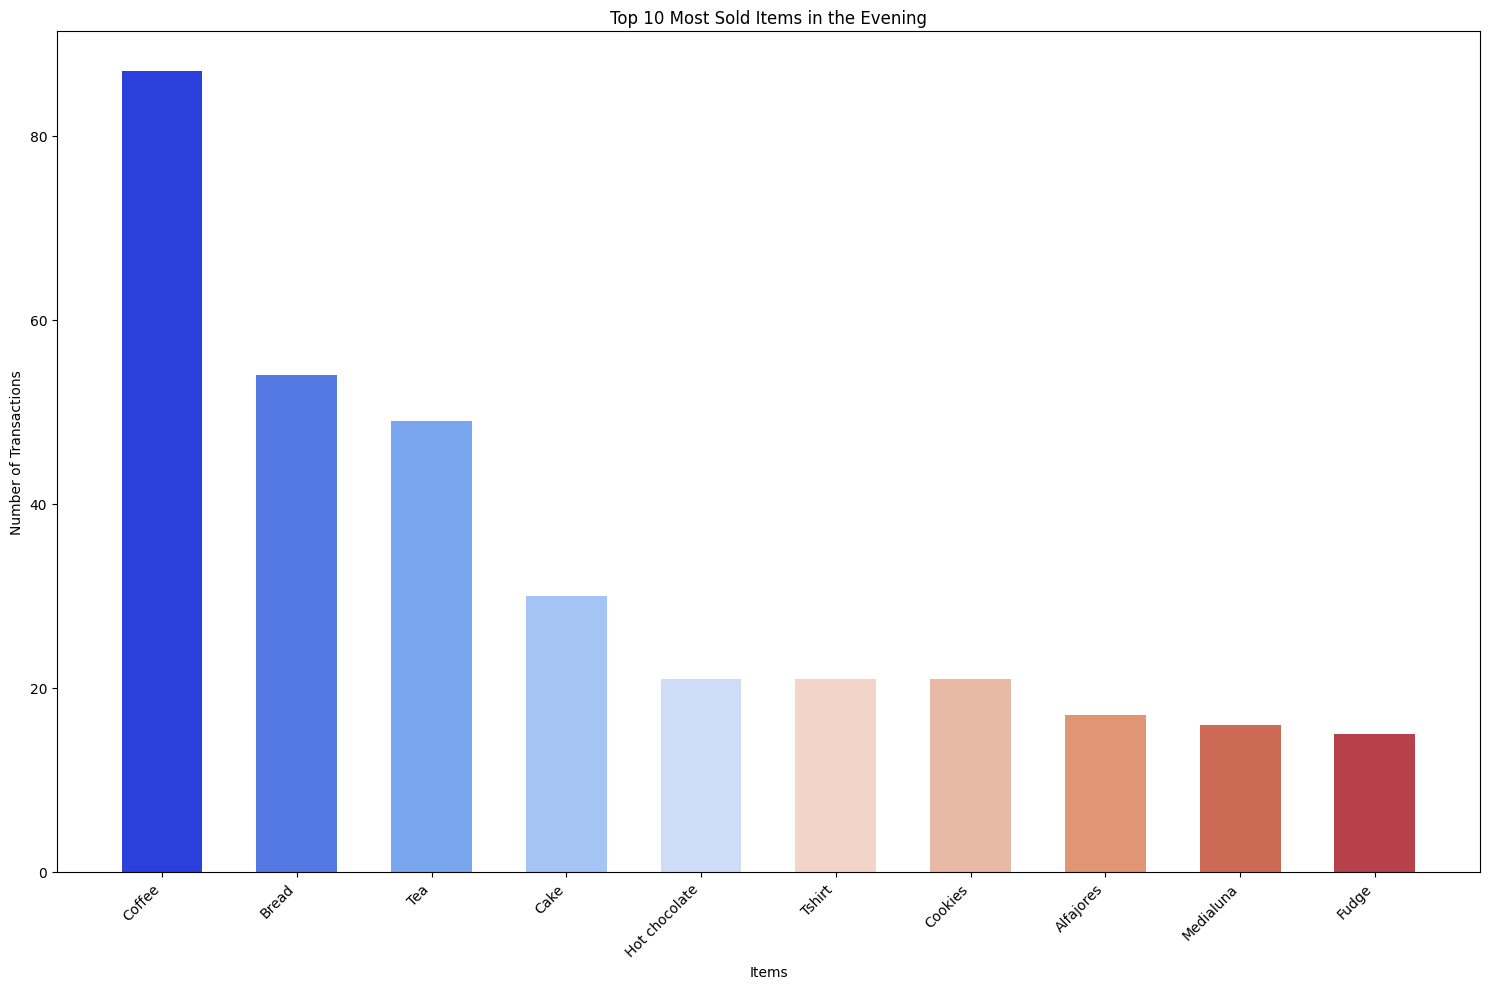

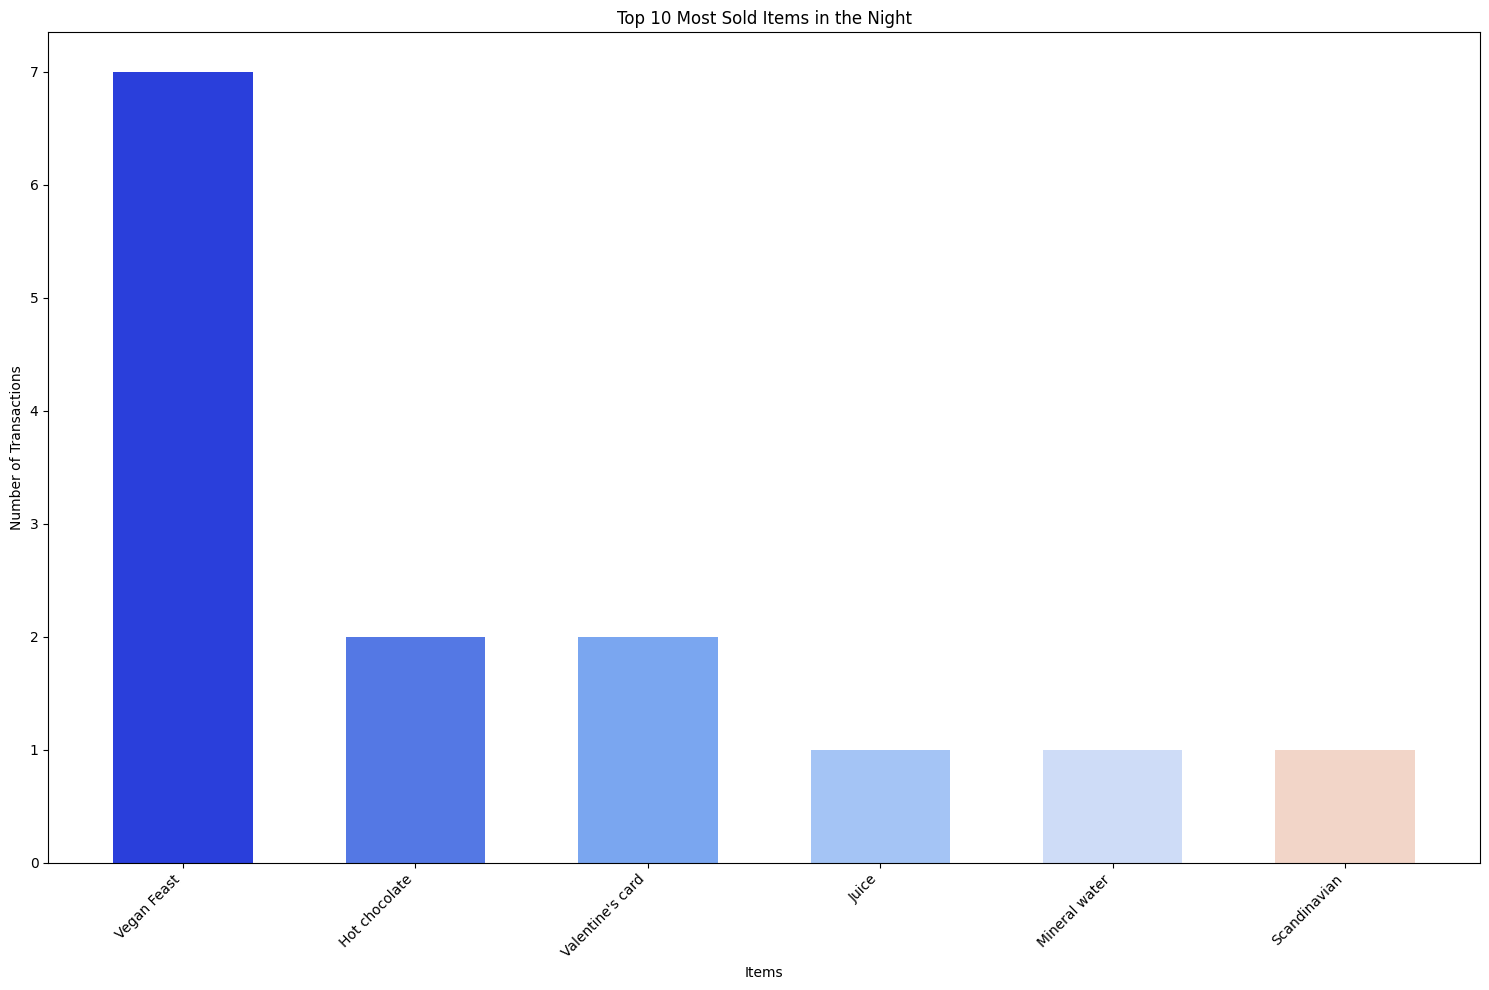

In [41]:
# 20

import matplotlib.pyplot as plt

period_col = "period_day"

colors = [
    "#2a3fdb", "#5478e4", "#7aa6f0", "#a4c4f5", "#cedcf7",
    "#f2d5c8", "#e8b9a5", "#e09674", "#cc6a55", "#b7414a"
]

def plot_top_items_for_period(period_value, pretty_label):
    # Filter by period (case-insensitive)
    subset = df[df[period_col].str.lower() == period_value.lower()]

    # Top 10 items
    top_items = subset["Item"].value_counts().head(10)

    plt.figure(figsize=(15, 10))
    plt.bar(
        top_items.index,
        top_items.values,
        color=colors[:len(top_items)],
        width=0.6
    )
    plt.title(f"Top 10 Most Sold Items in the {pretty_label}")
    plt.xlabel("Items")
    plt.ylabel("Number of Transactions")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# === Run all four visualizations in ONE cell ===
plot_top_items_for_period("morning", "Morning")
plot_top_items_for_period("afternoon", "Afternoon")
plot_top_items_for_period("evening", "Evening")
plot_top_items_for_period("night", "Night")


21. It turns out that there is something different in the plot above, the insight is ____


It turns out that there is something different in the plot above, the insight is 'Coffee' remains a top seller across all periods. However, in the 'morning', 'Bread' and 'Pastry' are also very popular, while in the 'afternoon', 'Cake' and 'Sandwich' rise in popularity. During the evening, Coffee and Bread continue to dominate, while items like Hot chocolate become more noticeable. At night, Vegan Feast becomes the top item, along with smaller counts for Hot chocolate and other light items, suggesting a shift towards comfort items later in the day.

I found a valentine card, I was curious about when people bought it so I made a visualization of it

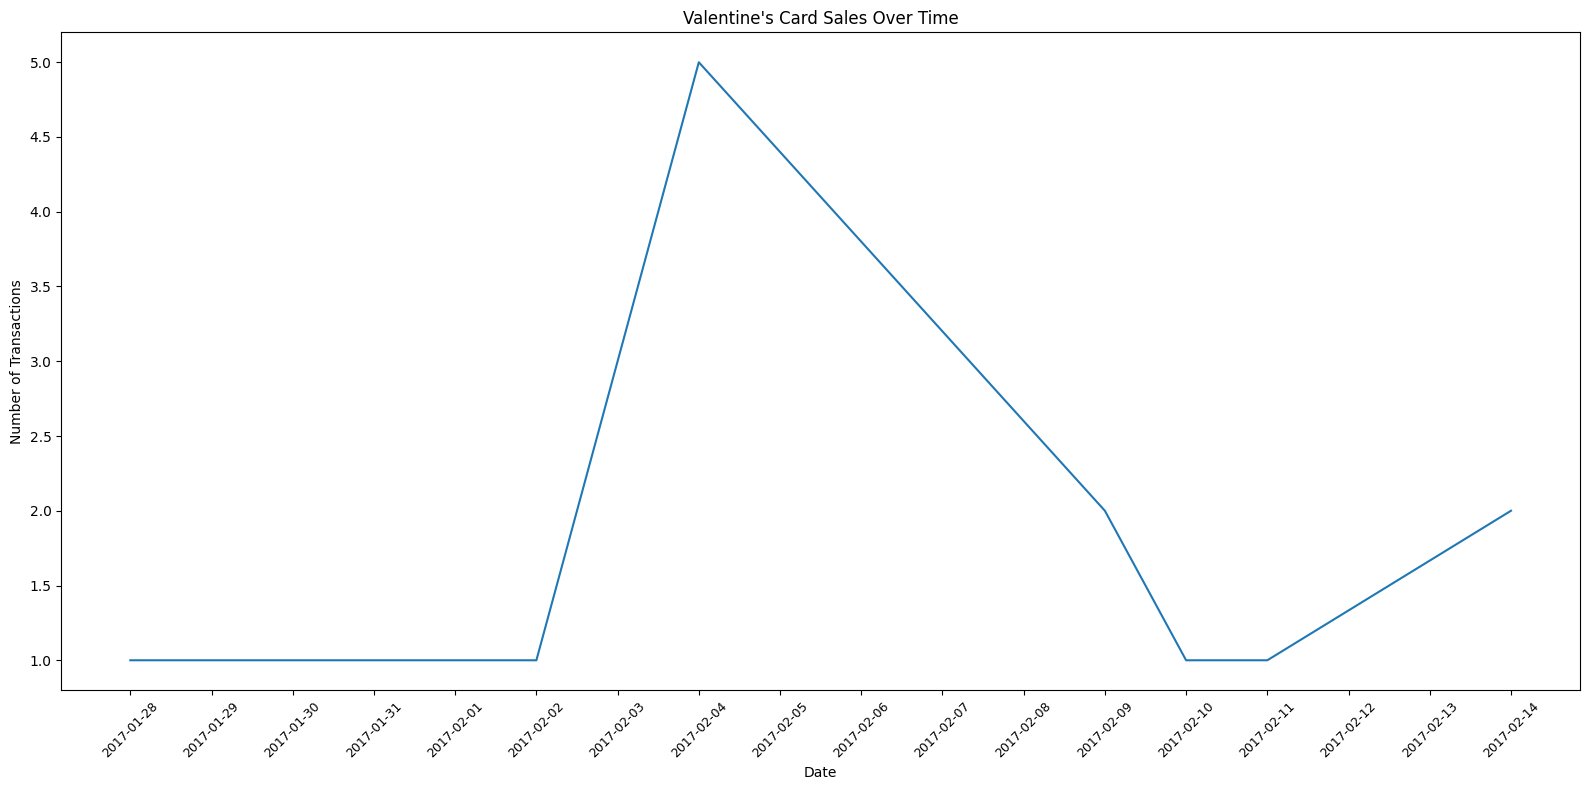

In [36]:
# 22

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure datetime
df["date_time"] = pd.to_datetime(df["date_time"], dayfirst=True)

# Filter Valentine's card
valentine_df = df[df["Item"] == "Valentine's card"].copy()

# Extract only the date
valentine_df["date"] = valentine_df["date_time"].dt.date
valentine_daily = valentine_df.groupby("date").size()

# Convert index to proper datetime for formatting
dates = pd.to_datetime(valentine_daily.index)

# Plot
plt.figure(figsize=(16, 8))
plt.plot(dates, valentine_daily.values)

plt.title("Valentine's Card Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))   # show every day
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45, fontsize=9)

plt.tight_layout()
plt.show()


23. I found the insight from the sale of the Valentine's cards above is ____


The insight from the sale of the Valentine's card sales show a strong seasonal pattern concentrated in early February. The highest peak occurs around February 4th, indicating an early surge of purchases. A smaller secondary increase appears on February 14th (Valentin's Day), showing that some customers also buy last-minute gifts.

## **Applying the Apriori Algorithm**
With a solid understanding of the data, I shift my focus to identifying associations between items using the Apriori algorithm.

### **Data Preparation for Apriori**
I need to transform the dataset into a format suitable for the Apriori algorithm, where each transaction is represented as a row and each item as a column.

In [42]:
# 24

basket = df.groupby(['Transaction', 'Item'])['Item'].count().unstack().fillna(0)
display(basket.head())

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
#25

# Convert quantities to 1 and 0

basket_encoded = basket.applymap(lambda x: 1 if x > 0 else 0)
display(basket_encoded.head())

/tmp/ipython-input-3805708932.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encoded = basket.applymap(lambda x: 1 if x > 0 else 0)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **Finding Frequent Itemsets**
Now, I apply the Apriori algorithm to find frequent itemsets with a minimum support threshold. This will help identify combinations of items that are frequently purchased together. Apriori: (min_support=0.02), Association Rules: (metric="lift", min_threshold=1)

In [50]:
# 26
from mlxtend.frequent_patterns import apriori, association_rules
df_apriori = apriori(basket_encoded, min_support = 0.02, use_colnames = True)
df_apriori

/usr/local/lib/python3.12/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.036344,(Alfajores)
1,0.327205,(Bread)
2,0.040042,(Brownie)
3,0.103856,(Cake)
4,0.478394,(Coffee)
5,0.054411,(Cookies)
6,0.039197,(Farm House)
7,0.058320,(Hot chocolate)
8,0.038563,(Juice)
9,0.061807,(Medialuna)


In [54]:
# 27

from mlxtend.frequent_patterns import association_rules
import numpy as np

# You already have:
# df_apriori = apriori(basket_encoded, min_support=0.02, use_colnames=True)

# 1. Generate association rules (as you described)
rules = association_rules(
    df_apriori,
    metric="lift",
    min_threshold=1
)

# 2. Compute extra metrics to match your table
supA = rules["antecedent support"]
supB = rules["consequent support"]
supAB = rules["support"]
conf = rules["confidence"]

# Representativity (if you want it all = 1.0 like in your example, keep line below)
rules["representativity"] = 1.0
# If you prefer a formula, you could use: rules["representativity"] = supAB / supA

# Jaccard index
rules["jaccard"] = supAB / (supA + supB - supAB)

# Kulczynski
rules["kulczynski"] = 0.5 * (conf + supAB / supB)

# Certainty factor
rules["certainty"] = (conf - supB) / (1 - supB)

# Zhang's metric
rules["zhangs_metric"] = (conf - supB) / (
    np.maximum(conf, supB) - conf * supB
)

# 3. Reorder columns EXACTLY as you specified
df_association_rules = rules[
    [
        "antecedents",
        "consequents",
        "antecedent support",
        "consequent support",
        "support",
        "confidence",
        "lift",
        "representativity",
        "leverage",
        "conviction",
        "zhangs_metric",
        "jaccard",
        "certainty",
        "kulczynski",
    ]
].reset_index(drop=True)

df_association_rules.head(20)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,1.0,0.000985,1.017305,0.050231,0.075908,0.017011,0.213884
1,(Bread),(Pastry),0.327205,0.086107,0.029160,0.089119,1.034977,1.0,0.000985,1.003306,0.036980,0.075908,0.003296,0.213884
2,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,1.0,0.005044,1.011905,0.102840,0.103745,0.011765,0.320679
3,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,1.0,0.005044,1.102664,0.176684,0.103745,0.093105,0.320679
4,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,1.0,0.008959,1.111865,0.439556,0.106736,0.100611,0.197779
5,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,1.0,0.008959,1.075372,0.420538,0.106736,0.070090,0.197779
6,(Coffee),(Cookies),0.478394,0.054411,0.028209,0.058966,1.083723,1.0,0.002179,1.004841,0.081700,0.055905,0.004818,0.288707
7,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,1.0,0.002179,1.083174,0.148110,0.055905,0.076787,0.288707
8,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,1.0,0.001683,1.058553,0.109048,0.058333,0.055314,0.284542
9,(Coffee),(Hot chocolate),0.478394,0.058320,0.029583,0.061837,1.060311,1.0,0.001683,1.003749,0.060403,0.058333,0.003735,0.284542


## Conclusion: The Impact of Data Analysis
28. As my day of analysis comes to a close, I compile my findings into a comprehensive report that highlights several key insights derived from The Bread Basket dataset:



# **Managerial Implications**

## **1) Store Layout and Shelf Placement**

The association rules highlight several strong item relationships, especially involving **Coffee**, **Cake**, **Pastry**, **Bread**, **Cookies**, **Hot Chocolate**, and **Sandwiches**. These items should be strategically placed to increase cross-sales:

### **Place related items close together:**

* **Coffee → Cake / Pastry / Sandwich / Medialuna**
  Coffee appears at the center of many high-confidence rules. Positioning pastries, cakes, and small baked goods near the coffee machines or coffee shelves encourages impulse pairing.

* **Pastry ↔ Bread**
  Since customers who buy Pastry often buy Bread (and vice versa), both categories should be placed in the same bakery area, ideally adjacent shelves.

* **Cookies and Hot Chocolate near Coffee**
  The rules show that cookies and hot chocolate frequently appear together with coffee. Placing them in the same “warm snacks” or “comfort food” zone supports natural customer behavior.

* **Toast near Coffee products**
  Toast has a high lift when paired with Coffee. Position small toast packs or ready-to-eat bread near coffee grinders or ready-brew sections.

The rules show that customers' baskets naturally contain these combinations. Reducing the physical distance between these products makes it easier for customers to complete their typical basket, increasing basket size.

---

## **2) Bundling and Promotions**

Create **combo deals** based on rules with the highest lift and confidence. Examples:

* **“Coffee & Pastry Pack”**: Coffee + Pastry
* **“Coffee Break Combo”**: Coffee + Cake + Cookies
* **“Light Breakfast Bundle”**: Coffee + Medialuna + Toast
* **“Warm Treat Set”**: Coffee + Hot Chocolate + Cookies
* **“Tea & Cake Set”**: Tea + Cake (strong bidirectional rule)

### **Run cross-coupons:**

* Buy **Coffee**, get a discount on **Cake** or **Pastry**.
* Buy **Pastry**, get a small discount on **Bread**.
* Buy **Tea**, get a discount on **Cake**.
* Buy **Cookies**, get a discount on **Coffee**.

These promotions reinforce pairings that customers are **already naturally buying**, which typically increases conversion rates and incremental sales more effectively than random discount pairings.

---

## **3) Recommendation Systems (Online or Loyalty App)**

Use the rules directly to create “**Customers who bought X also buy Y**” recommendations:

* If a basket includes **Coffee and Cake**, recommend **Pastry** or **Cookies**.
* If someone buys **Coffee**, recommend **Cake**, **Pastry**, **Sandwich**, **Medialuna**, or **Toast**.
* If someone buys **Pastry**, suggest **Bread**.
* If a customer buys **Tea**, recommend **Cake** (strong symmetric rule).
* If a basket includes **Hot Chocolate**, suggest **Coffee**.
* If someone buys **Cookies**, recommend **Coffee**.

Because these rules have **high confidence and lift**, the recommendations will feel natural, personalized, and relevant to customers.

---

## **4) Strategic Insights Summary**

* **Coffee is the central anchor item** in the dataset, appearing in most high-confidence rules.
  → Ideal for cross-selling and product placement strategies.

* **Bakery items cluster strongly together** (Cake, Pastry, Bread, Medialuna).
  → A single, well-organized bakery zone can increase conversions.

* **Warm comfort items** (Hot chocolate, Cookies) connect to coffee consumption.
  → Promote during colder seasons or morning/evening peaks.

* **Tea & Cake** is a unique pairing outside the coffee cluster.
  → Good opportunity for a separate promotional bundle.

These association patterns can guide product placement, bundling, digital recommendations, and promotional strategy to increase total basket value and improve customer shopping experience.


Jevon Ivander K / 0706022310028